In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import pickle

In [2]:
### Load data
df = pd.read_csv('train_dataset.csv', encoding='ISO-8859-1')
# df = pd.read_csv('train_dataset.csv', encoding='ISO-8859-1', low_memory=False)
df = df.dropna()

y = df["type"]
X = df.drop(columns=["type"])
X = X.drop(columns=["label"])

# X = X[X["src_ip"] != '0']

/var/folders/nd/w5k06k917hbg7rpdv3ty357c0000gn/T/ipykernel_7812/2575329083.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train_dataset.csv', encoding='ISO-8859-1')


In [3]:
# from sklearn import preprocessing

# labels = X.columns
# print(labels)

# print(X.select_dtypes(include=['object']).columns)

# # for col in X.columns:
# #     if (X[col].dtype == 'float64' or X[col].dtype == 'int64'):
# #         X[col] = X[col].fillna(X[col].mean())
# #     elif(X[col].dtype == 'object'):
# #         X[col] = X[col].fillna(X[col].mode()[0])

# for lab in labels:
#     toenc = X[lab]

#     toenc = np.array(toenc).reshape(-1, 1)

#     le = preprocessing.OrdinalEncoder()
#     le.fit(toenc)
#     toenc = le.transform(toenc)
#     print(lab)

# print(X["src_bytes"].unique())
# myarr = np.array(X["src_bytes"]).reshape(-1, 1)

# for el in myarr:
#     print(type(el.item()))

In [4]:
## Controllare se è necessario data cleaning
## IDEA 1: se ci sono delle mixed columns potrebbe essere che i valori sbagliati indichino delle misurazioni errate
## -> se le misurazioni sono errate bisogna eliminare tutta la riga
##
## Con mixed values facile accorgersi ma le altre colonne?
## IDEA 2: controllare il type dei valori di ogni colonna (se vengono letti come stringhe ma sono numeri...?)
## -> 
## 
## IDEA 3: controllare la distribuzione dei valori numerici delle colonne e vedere se hanno senso
## IDEA 4: controllare i valori assunti dalle stringhe e vedere se hanno senso

In [5]:
## IDEA 1
tocheck = X["src_bytes"].unique()
index = 0
string_arr = []

for i in range(0,len(tocheck)):
    if type(tocheck[i]) == str:
        string_arr.append(tocheck[i])
        index += 1

# print(index, len(tocheck))
# print(string_arr)

for el in range(0,len(string_arr)):
    try:
        int(string_arr[el])
    except:
        print(string_arr[el])

0.0.0.0


In [6]:
## Come si può notare l'unica situazione in cuio questi valori mumerici non possono essere convertiti in stringhe è
## quando al posto di un valore numerico c'è la stringa "0.0.0.0"
##
## Questo valore è sbagliato in questa posizione in quanto si tratta di un indirizzo IP e non di un valore numerico
## in una colonna che dovrebbe rappresentare una quantità di kilobytes
##
## -> isolare le righe
## -> eliminare le righe (?)

err_arr = X.loc[X["src_bytes"] == "0.0.0.0"]
# print(err_arr, len(err_arr))
# print(len(err_arr))

zero_ip_arr = X.loc[X["src_ip"] == "0"]
# print(zero_ip_arr, len(zero_ip_arr))
# print(len(zero_ip_arr))

print(err_arr.index, zero_ip_arr.index)

err_arr.to_csv("err_arr.csv")

## Possiamo essere sicuri del fatto che se il valore di "src_bytes" è "0.0.0.0" allora il valore di "src_ip" è "0"
## e VICEVERSA !!
## Cosa vuol dire se "src_ip" è "0" ?
## 
## L'indirizzo IP sorgente che genera l'endpoint è "0"

## Se "src_bytes" è "0.0.0.0" allora la tipologia di attacco è "normal" ma NON viceversa
# print((y.loc[err_arr.index]).unique())

## Se "src_bytes" è "0.0.0.0" allora "dst_ip" inizia con "ff02"? e viceversa?
# print(len(err_arr.loc[err_arr["dst_ip"].str.startswith("ff02")]))
# print(len(X.loc[X["dst_ip"].str.startswith("ff02")]))
## Tutte le righe in cui "src_ip" è "0.0.0.0" iniziano con "ff02" ma NON viceversa


## Rimuovere righe in cui "src_bytes" è "0.0.0.0"
X = X.drop(index=err_arr.index)
y = y.drop(index=err_arr.index)

# X.astype({'src_bytes': 'int'}).dtypes
X["src_bytes"] = pd.to_numeric(X["src_bytes"], errors='coerce')

Index([  119,   178,  1970,  2196,  4588,  4915,  4918,  5160,  5729,  6275,
       10053, 11145, 11215, 11587, 13757, 14426, 15072, 17901, 18725],
      dtype='int64') Index([  119,   178,  1970,  2196,  4588,  4915,  4918,  5160,  5729,  6275,
       10053, 11145, 11215, 11587, 13757, 14426, 15072, 17901, 18725],
      dtype='int64')


In [7]:
## IDEA 2
print(X.dtypes)

X.astype({'src_bytes': 'int64', 'ts': 'datetime64[ms]', 'dns_AA': 'bool', 'dns_RD': 'bool', 'dns_RA': 'bool', 'dns_rejected': 'bool', 'ssl_resumed': 'bool', 'ssl_established': 'bool', 'weird_notice': 'bool'}).dtypes
# X.astype({'src_bytes': 'int64', 'ts': 'datetime64[ms]', 'dns_AA': 'bool', 'dns_RD': 'bool', 'dns_RA': 'bool', 'dns_rejected': 'bool', 'ssl_resumed': 'bool', 'ssl_established': 'bool', 'http_trans_depth': 'int64', 'http_user_agent': 'int64', 'weird_notice': 'bool'}).dtypes

ts                          int64
src_ip                     object
src_port                    int64
dst_ip                     object
dst_port                    int64
proto                      object
service                    object
duration                  float64
src_bytes                   int64
dst_bytes                   int64
conn_state                 object
missed_bytes                int64
src_pkts                    int64
src_ip_bytes                int64
dst_pkts                    int64
dst_ip_bytes                int64
dns_query                  object
dns_qclass                  int64
dns_qtype                   int64
dns_rcode                   int64
dns_AA                     object
dns_RD                     object
dns_RA                     object
dns_rejected               object
ssl_version                object
ssl_cipher                 object
ssl_resumed                object
ssl_established            object
ssl_subject                object
ssl_issuer    

ts                        datetime64[ms]
src_ip                            object
src_port                           int64
dst_ip                            object
dst_port                           int64
proto                             object
service                           object
duration                         float64
src_bytes                          int64
dst_bytes                          int64
conn_state                        object
missed_bytes                       int64
src_pkts                           int64
src_ip_bytes                       int64
dst_pkts                           int64
dst_ip_bytes                       int64
dns_query                         object
dns_qclass                         int64
dns_qtype                          int64
dns_rcode                          int64
dns_AA                              bool
dns_RD                              bool
dns_RA                              bool
dns_rejected                        bool
ssl_version     

In [8]:
## IDEA 3
# print(X.describe())

X.describe().T.to_csv("describe.csv")

for col in X.loc[:, X.dtypes == object].columns:
    print(col, X[col].unique())

src_ip ['192.168.1.152' '192.168.1.190' '192.168.1.180' '192.168.1.195'
 '192.168.1.184' '246.231.236.214' '127.0.0.1' '192.168.1.194'
 '192.168.1.79' '192.168.1.6' '225.128.21.50' '69.33.196.249'
 '132.100.120.127' '192.168.1.133'
 '2405:6e00:10ce:2c00:20c:29ff:feee:e07a' '28.142.47.6' '64.124.14.21'
 '192.168.1.17' '192.168.1.1' 'fe80::8520:4eba:6770:702a' '67.136.40.178'
 '93.145.20.221' '192.168.1.103' '237.164.4.95'
 'fe80::a691:b1ff:fe1e:5790' '192.168.1.193' '172.17.0.8' '194.216.43.117'
 '172.17.0.3' '172.17.0.7' 'fe80::f554:8774:9968:b60b' '172.17.0.5'
 'fe80::343b:2cf:e9fb:6570' '204.196.144.59' '192.34.234.30'
 '246.105.137.135' '124.115.214.182' '10.15.192.180' '192.168.1.169'
 'fe80::601f:9cde:4832:2f3f' 'fe80::bd96:5345:d611:d910'
 'fe80::20c:29ff:feee:e07a' '168.131.31.142' '192.168.1.250' '27.9.32.205'
 '7.220.242.86' '82.240.45.2' '213.248.242.41' '192.168.1.191'
 '192.30.45.30' '44.240.116.25' '255.14.106.126'
 'fe80::7895:1710:a0d3:2f10' 'fe80::8d4f:d8aa:9baa:955f' '

In [9]:
## Encoding
from sklearn import preprocessing

print(X.shape, y.shape)

labels = X.columns

for lab in labels:
    toenc = X[lab]

    toenc = np.array(toenc).reshape(-1, 1)

    le = preprocessing.OrdinalEncoder()
    le.fit(toenc)
    toenc = le.transform(toenc)
    X[lab] = toenc
    # print(lab)

print(X.shape, y.shape)

# X
# le = preprocessing.OrdinalEncoder()
# X = np.array(X).reshape(-1, 1)
# le.fit(X)
# X = le.transform(X)
# y
le = preprocessing.LabelEncoder()
le.fit(y)
y_enc = le.transform(y)

print(X.shape, y.shape)

### Split data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y_enc, test_size=0.2, random_state=42)

(616983, 44) (616983,)
(616983, 44) (616983,)
(616983, 44) (616983,)


Voglio applicare PCA però devo prima standardizzare i dati.
Per standardizzare i dati devo prima encodare quelli categorici

In [ ]:
### Look at the dataset
from sklearn import decomposition

## Scaling
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)

## PCA
pca = decomposition.PCA()
pca.fit(X_train_std)
X_train_pca = pca.transform(X_train_std)
X_val_pca = pca.transform(X_val_std)
# pca.fit(X_train)
# X_train_pca = pca.transform(X_train)
# X_val_pca = pca.transform(X_val)

## LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=9)
lda.fit(X_train_std, y_train)
X_train_lda = lda.transform(X_train_std)
X_val_lda = lda.transform(X_val_std)
# lda.fit(X_train, y_train)
# X_train_lda = lda.transform(X_train)
# X_val_lda = lda.transform(X_val)

print("Dataset number of classes: ", len(np.unique(y_train)))
print("LDA number of output dimensions: ", X_train_lda.shape[1])

# ## t-SNE
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# for p in [5,30,50,100]:
#     tsne = TSNE(n_components=3, perplexity=p)
#     tsne.fit(np.concat([X_train_std, X_val_std]))
#     X_train_tsne = tsne.fit_transform(X_train_std)
#     X_val_tsne = tsne.fit_transform(X_val_std)

#     plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=y_train)
#     plt.show()

Dataset number of classes:  10
LDA number of output dimensions:  9


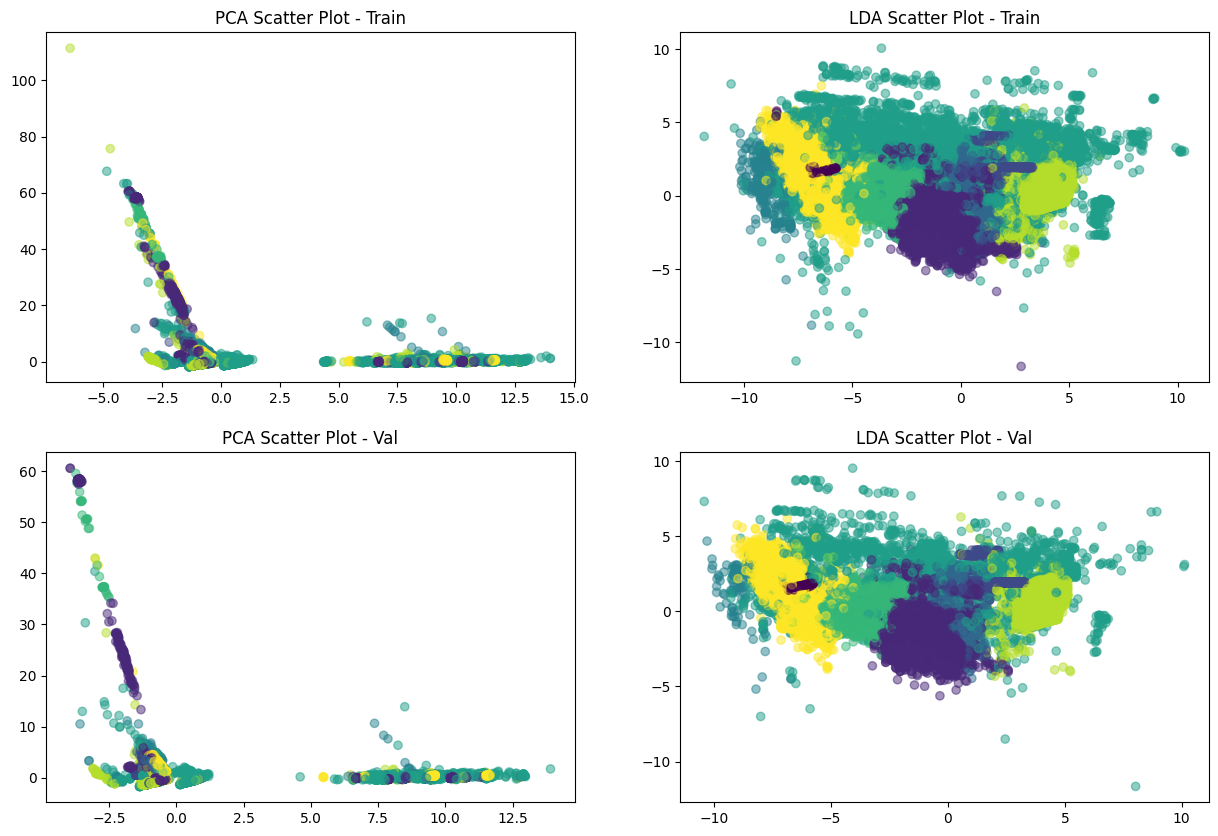

In [11]:
## PCA and LDA plotting

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# PCA scatter plot
axs[0, 0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
axs[0, 0].set_title('PCA Scatter Plot - Train')

# LDA scatter plot
axs[0, 1].scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', alpha=0.5)
axs[0, 1].set_title('LDA Scatter Plot - Train')

# PCA scatter plot
axs[1, 0].scatter(X_val_pca[:, 0], X_val_pca[:, 1], c=y_val, cmap='viridis', alpha=0.5)
axs[1, 0].set_title('PCA Scatter Plot - Val')

# LDA scatter plot
axs[1, 1].scatter(X_val_lda[:, 0], X_val_lda[:, 1], c=y_val, cmap='viridis', alpha=0.5)
axs[1, 1].set_title('LDA Scatter Plot - Val')

plt.show()


---

In [ ]:
### KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

### KNN
best_score = 0
best_k = -1

for k in np.arange(1,10,2):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    score = clf.score(X_val, y_val)
    # print("Val set accuracy with K={:d}: {:.4f}".format(k,score))
    if best_score < score:
        best_score = score
        best_k = k
print("\nBest K = {:d} with score = {:.4f}".format(best_k, best_score))
# Save the best KNN model to a pickle file
with open('best_knn.pkl', 'wb') as f:
    pickle.dump(clf, f)

### KNN with PCA
best_score = 0
best_k = -1

for k in np.arange(1,10,2):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_pca, y_train)
    score = clf.score(X_val_pca, y_val)
    # print("(PCA) Val set accuracy with K={:d}: {:.4f}".format(k,score))
    if best_score < score:
        best_score = score
        best_k = k
print("\nBest K = {:d} with score = {:.4f}".format(best_k, best_score))
# Save the best KNN model to a pickle file
with open('best_knn_pca.pkl', 'wb') as f:
    pickle.dump(clf, f)

### KNN with LDA
best_score = 0
best_k = -1

for k in np.arange(1,10,2):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_lda, y_train)
    score = clf.score(X_val_lda, y_val)
    # print("(PCA) Val set accuracy with K={:d}: {:.4f}".format(k,score))
    if best_score < score:
        best_score = score
        best_k = k
print("\nBest K = {:d} with score = {:.4f}".format(best_k, best_score))
# Save the best KNN model to a pickle file
with open('best_knn_lda.pkl', 'wb') as f:
    pickle.dump(clf, f)


In [ ]:
## Il risultato dell'accuracy è molto alto con K=1, vuol dire che c'è un problema di oversampling
##
## I casi in cui va classificato come "???" sono molto più alti di tutti gli altri casi
print(y)

count = 0
for i in range(0,len(y)):
    if y.iloc[i] != "normal":
        count += 1
print(count)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train_lda, y_train)

cm = confusion_matrix(y_val, clf.predict(X_val_lda), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [ ]:
## Ho stabilito che non è un propblema di oversampling ma probabilmente l'accuracy alta potrebbe 
## essere dovuta al fatto che da qualche parte faccio il training anche su il validation set
## 
## Non vedo molte altre opzioni
##
##
## Invece potrebbe essere che il dataset è sbilanciato e quindi devo riuscire a bilanciarlo
## -> fare in modo che venga mantenuta la proporzione nello splitting tra train e val (?)
## --> guarda la distribuzione che hai nel val
pd.DataFrame(y_val).value_counts()

In [ ]:
# ### Save the model 
# # The best result is with LDA and k=15

# clf = KNeighborsClassifier(n_neighbors=15)
# clf.fit(X_train_lda, y_train)
# ### SAVE ???

---

In [ ]:
### Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
print("Random Forest accuracy: {:.4f}".format(rf.score(X_val, y_val)))

cm = confusion_matrix(y_val, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_pca, y_train)
y_pred = rf.predict(X_val_pca)
print("Random Forest accuracy: {:.4f}".format(rf.score(X_val_pca, y_val)))

cm = confusion_matrix(y_val, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_lda, y_train)
y_pred = rf.predict(X_val_lda)
print("Random Forest accuracy: {:.4f}".format(rf.score(X_val_lda, y_val)))

cm = confusion_matrix(y_val, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

---

In [ ]:
### SVM classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ["linear", "poly"]}  
  
grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train, y_train)
print("SVM accuracy: {:.4f}".format(grid.score(X_val, y_val)))
print("Best parameters: ", grid.best_params_)

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ["linear", "poly"]}  
  
grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train_pca, y_train)
print("SVM accuracy: {:.4f}".format(grid.score(X_val_pca, y_val)))
print("Best parameters: ", grid.best_params_)

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ["linear", "poly"]}  
  
grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train_lda, y_train)
print("SVM accuracy: {:.4f}".format(grid.score(X_val_lda, y_val)))
print("Best parameters: ", grid.best_params_)

---

In [19]:
### FF Classifier
import random
import os
import time

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, Subset
from torch.utils.tensorboard import SummaryWriter

In [2]:
# For reproducibility
def fix_random(seed: int) -> None:
    """Fix all the possible sources of randomness.

    Args:
        seed: the seed to use. 
    """
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True  # slower

seed = 42

In [3]:
# Define the Data Layer        
class MyDataset(Dataset):
    def __init__(self, X, y):
        
        self.X = torch.FloatTensor(X)
        self.y = torch.LongTensor(y)
         
        self.num_features = X.shape[1]
        self.num_classes = len(np.unique(y))
       

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx, :], self.y[idx]

In [4]:
# define a function with different normalization and scaling techniques
def preprocess(X_train, X_val, modality):
    
    X_train_p, X_val_p = X_train, X_val

    if modality == 'l2' or modality == 'l1':
        X_train_p = preprocessing.normalize(X_train, norm=modality)
        X_val_p = preprocessing.normalize(X_test, norm=modality)

    if modality == 'standard' or modality == 'min-max':
        if modality == 'standard':
            scaler = preprocessing.StandardScaler()
            scaler.fit(X_train)
        elif modality == 'min-max':
            scaler = preprocessing.MinMaxScaler()
            scaler.fit(X_train)
        
        X_train_p = scaler.transform(X_train)
        X_val_p = scaler.transform(X_val)
        
    return X_train_p, X_val_p

In [5]:
# Architecture

class FeedForwardPlus(nn.Module):
    def __init__(self, input_size, num_classes, hidden_size, depth=1, batch_norm=False, drop=0):
        super(FeedForwardPlus, self).__init__()
        
        model = []
        model += [nn.Linear(input_size, hidden_size)]
        if batch_norm:
            model += [nn.BatchNorm1d(hidden_size)]
        model += [nn.ReLU()]

        block = [
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU()
        ]

        block_batch_norm = [
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU()
        ]

        block_dropout = [
            nn.Dropout(drop),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU()
        ]

        for i in range(depth):
            if not batch_norm and drop == 0:
                model += block
            elif batch_norm and drop == 0:
                model += block_batch_norm
            elif drop > 0 and not batch_norm:
                model += block_dropout
        
        self.model = nn.Sequential(*model)
        
        self.output = nn.Linear(hidden_size, num_classes)
        

    def forward(self, x):
        h = self.model(x)
        out = self.output(h)
        return out

In [6]:
# Define a function for the training process

def train_model(model, criterion, optimizer, epoch, scheduler, train_loader, val_loader, device, writer, log_name="model"):
    n_iter = 0
    best_valid_loss = float('inf')
    for epoch in range(epoch):
        model.train()
        
        for data, targets in train_loader:
            data, targets = data.to(device), targets.to(device)  # why here?
            
            optimizer.zero_grad()

            # Forward pass
            y_pred = model(data)

            # Compute Loss
            loss = criterion(y_pred, targets)
            writer.add_scalar("Loss/train", loss, n_iter)

            # Backward pass
            loss.backward()
            optimizer.step()

            n_iter += 1
        
        labels, _, y_pred = test_model(model, val_loader, device)
        loss_val = criterion(y_pred, labels)
        writer.add_scalar("Loss/val", loss_val, epoch)
        
        # save best model
        if loss_val.item() < best_valid_loss:
            best_valid_loss = loss_val.item()
            if not os.path.exists('models'):
                os.makedirs('models')
            torch.save(model.state_dict(), 'models/'+log_name)
        
        writer.add_scalar("hparam/Learning Rate", scheduler.get_last_lr()[0], epoch)
        
        scheduler.step()
            
    return model, best_valid_loss

In [ ]:
# Define a function to evaluate the performance on validation and test sets

def test_model(model, data_loader, device):
    model.eval()
    y_pred = []
    
    for data, targets in data_loader:
        data, targets = data.to(device), targets.to(device)
        y_pred += model(data)
        #print(y_pred)
    
    y_pred = torch.stack(y_pred).squeeze()
    y_pred_c = y_pred.argmax(dim=1, keepdim=True).squeeze()
    
    return y_pred_c, y_pred

In [ ]:
# look for GPU
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('mps')
print("Device: {}".format(device))

In [17]:
# Scale data
modality = "min-max"
X_train, X_val = preprocess(X_train, X_val, modality)


# Create the dataset
train_dataset = MyDataset(X_train, y_train)
val_dataset = MyDataset(X_val, y_val)

In [ ]:
start = time.time()

# hyperparatemeters 
batch_size = 16
depth = 2
hidden_size = 16
batch_norm = True
drop = 0
num_epochs = 100  # try 100, 200, 500
learning_rate = 0.01
gamma=0.5
step_size=25
log_name = "B"+str(batch_size)+"-dim"+str(hidden_size)+"-dp"+str(depth)+"-ep"+str(num_epochs)+"-lr"+str(learning_rate)+"-steplr"+str(step_size)+"-gamma"+str(gamma)+"-BN"+str(batch_norm)+"-drop"+str(drop)

# fix the seed for reproducibility
fix_random(seed)


# Create relative dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)


# Define the architecture, loss and optimizer
model = FeedForwardPlus(train_dataset.num_features, train_dataset.num_classes, hidden_size, depth, batch_norm=batch_norm, drop=drop)
print(model)
model.to(device)


# Define the training elements
criterion = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)


# Test before the training
y_test, y_pred_c, _ = test_model(model, val_loader, device)
acc = (y_test == y_pred_c).float().sum() / y_test.shape[0]
print("Accuracy before training:", acc.cpu().numpy())


# Start tensorboard
writer = SummaryWriter('runs/'+log_name)


# Train the model 
model = train_model(model, criterion, optimizer, num_epochs, scheduler, train_loader, val_loader, device, writer, log_name)


# Load best model
model.load_state_dict(torch.load("models/"+log_name, weights_only=True))
model.to(device)


# Test after the training
y_test, y_pred_c, _ = test_model(model, test_loader, device)
acc = (y_test == y_pred_c).float().sum() / y_test.shape[0]
print("Accuracy after training:", acc.cpu().numpy())


# Close tensorboard writer after a training
writer.flush()
writer.close()

# Save timestamp
end = time.time()
print("Time elapsed:", end - start)